<a href="https://colab.research.google.com/github/tejaswi-2230/Crime-prediction/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
!git clone https://github.com/tejaswi-2230/Crime-prediction.git

Cloning into 'Crime-prediction'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 2.05 MiB | 4.81 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
ml_pred = pd.read_csv('/content/drive/MyDrive/crime ML 9841 x 41.csv')

In [ ]:
ml_pred

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,Andhra Pradesh,ADILABAD,2013,96,72,13,61,0,61,65,...,30,2394,12,197,138,464,0,376,1390,6381
1,Andhra Pradesh,ANANTAPUR,2013,156,149,3,28,0,28,110,...,29,2537,23,337,43,161,0,573,1634,6913
2,Andhra Pradesh,CHITTOOR,2013,72,61,2,31,0,31,52,...,18,937,13,119,84,435,0,546,2239,5610
3,Andhra Pradesh,CUDDAPAH,2013,93,107,7,19,0,19,84,...,34,2310,9,318,163,207,0,464,1741,7048
4,Andhra Pradesh,CYBERABAD,2013,162,123,16,138,0,138,192,...,40,4284,43,350,338,1526,0,1104,3139,19992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,DELHI UT,WEST,2001,70,51,12,45,0,45,151,...,3,252,18,65,2,22,0,4,4151,7690
9836,LAKSHADWEEP,LAKSHADWEEP,2001,1,0,0,0,0,0,0,...,2,3,0,0,0,0,0,0,17,36
9837,LAKSHADWEEP,TOTAL,2001,1,0,0,0,0,0,0,...,2,3,0,0,0,0,0,0,17,36
9838,PUDUCHERRY,PONDICHERRY,2001,25,32,1,9,0,9,4,...,31,635,1,35,27,3,0,166,2324,4068


In [ ]:
ml_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9840 non-null   object
 1   DISTRICT                                             9840 non-null   object
 2   YEAR                                                 9840 non-null   int64 
 3   MURDER                                               9840 non-null   int64 
 4   ATTEMPT TO MURDER                                    9840 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9840 non-null   int64 
 6   RAPE                                                 9840 non-null   int64 
 7   CUSTODIAL RAPE                                       9840 non-null   int64 
 8   OTHER RAPE                                           9840 non-null   int64 
 9

In [ ]:
ml_pred.isna().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [ ]:
ml_pred.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [ ]:
ml_pred['STATE/UT'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       'Daman & Diu', 'Delhi UT', 'Lakshadweep', 'Puducherry',
       'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
     

In [ ]:
def state(name):
    state = ml_pred.groupby(['STATE/UT','DISTRICT','YEAR']).sum()['TOTAL IPC CRIMES']
    return state[name]

In [ ]:
import math
import statistics
import scipy.stats as stats

In [ ]:
ml_pred.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,...,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,2007.161890,88.565854,78.738618,9.754878,55.456098,0.005488,55.450610,85.836992,64.184553,21.652439,...,25.012398,753.362805,20.179878,106.482520,27.772967,202.046138,0.187602,226.296951,2214.523171,5404.141463
std,3.755581,325.417692,306.650391,58.733349,201.690457,0.111218,201.676202,354.035359,278.536450,93.769371,...,97.601717,3059.322654,97.446611,423.729483,170.367098,869.325453,2.319261,952.900601,8199.391921,18941.271529
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.000000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,2.000000,...,2.000000,43.750000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,264.000000,857.750000
50%,2007.000000,37.000000,28.000000,2.000000,21.000000,0.000000,21.000000,26.000000,19.000000,5.000000,...,8.000000,199.000000,5.000000,33.000000,2.000000,49.000000,0.000000,70.000000,750.000000,2130.500000
75%,2010.000000,66.000000,57.000000,6.000000,43.000000,0.000000,43.000000,60.000000,46.000000,14.000000,...,19.000000,533.250000,16.000000,80.000000,13.000000,139.250000,0.000000,180.000000,1631.000000,4025.000000
max,2013.000000,7601.000000,7964.000000,1616.000000,4335.000000,5.000000,4335.000000,11183.000000,9737.000000,2685.000000,...,2830.000000,60488.000000,2335.000000,8252.000000,4970.000000,19865.000000,83.000000,16076.000000,127850.000000,234385.000000


In [ ]:
ml_pred['TOTAL IPC CRIMES'].mean()

5404.141463414634

In [ ]:
ml_pred['TOTAL IPC CRIMES'].mode()

0    248
Name: TOTAL IPC CRIMES, dtype: int64

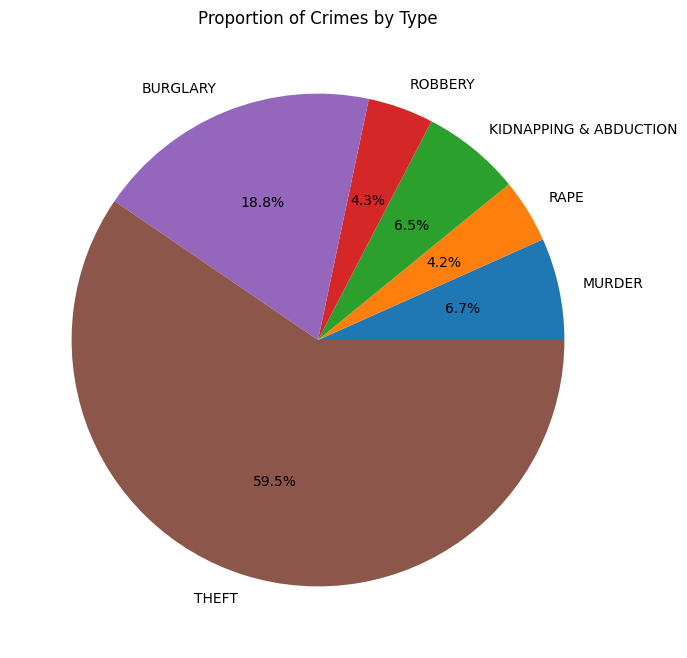

In [ ]:
crime_totals = ml_pred[['MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION', 'ROBBERY', 'BURGLARY', 'THEFT']].sum()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(crime_totals.values, labels=crime_totals.index, autopct='%1.1f%%')
plt.title('Proportion of Crimes by Type')
plt.show()

# **Implement machine learning model**

In [ ]:
min_val = ml_pred['TOTAL IPC CRIMES'].min()
max_val = ml_pred['TOTAL IPC CRIMES'].max()
range_val = (max_val - min_val) / 4
low = min_val + range_val
medium = low + range_val
high = medium + range_val

In [ ]:
def get_crime_level(crime_count):
    if crime_count <= low:
        return 1
    elif crime_count <= medium:
        return 2
    elif crime_count <= high:
        return 3
    else:
        return 4

ml_pred['CRIME_LEVEL'] = ml_pred['TOTAL IPC CRIMES'].apply(get_crime_level)

In [ ]:
crime_level_count = ml_pred['CRIME_LEVEL'].value_counts()
crime_level_count

CRIME_LEVEL
1    9685
3      67
2      48
4      40
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# fit and transform the STATE/UT column using the LabelEncoder
ml_pred["STATE/UT_encoded"] = le.fit_transform(ml_pred["STATE/UT"])

# fit and transform the DISTRICT column using the LabelEncoder
ml_pred["DISTRICT_encoded"] = le.fit_transform(ml_pred["DISTRICT"])

In [ ]:
grouped_state = ml_pred[["STATE/UT", "STATE/UT_encoded"]].groupby("STATE/UT").first()
grouped_state

,STATE/UT_encoded
STATE/UT,
A & N ISLANDS,0
A&N Islands,1
ANDHRA PRADESH,2
ARUNACHAL PRADESH,3
ASSAM,4
...,...
UTTARAKHAND,65
Uttar Pradesh,66
Uttarakhand,67


In [ ]:
grouped_district = ml_pred[["DISTRICT", "DISTRICT_encoded"]].groupby("DISTRICT").first()
grouped_district

,DISTRICT_encoded
DISTRICT,
24 PARGANAS NORTH,0
24 PARGANAS SOUTH,1
A and N ISLANDS,2
ADILABAD,3
AGAR,4
...,...
YADGIRI,823
YAMUNANAGAR,824
YAVATMAL,825


In [ ]:
ml_pred.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'CRIME_LEVEL', 'STATE/UT_encoded', 'DISTRICT_encoded'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# Algorithm : Logistic Regression

In [ ]:
X = ml_pred.drop(['CRIME_LEVEL','STATE/UT', 'DISTRICT'], axis=1)
y = ml_pred['CRIME_LEVEL']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
log_pred = log.predict(X_test)
log_score = log.score(X_test, y_test)
log_prob = log.predict_proba(X_test)[:, 1]
print('Logistic regression accuracy score : ',log_score)
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, log_pred)) #log_pred --> X_test
print()
print('Classification Report:')
print(classification_report(y_test, log_pred))

Logistic regression accuracy score :  0.9932249322493225

Confusion Matrix:
[[2892    3    0    0]
 [   1    7    2    0]
 [   0    4   19    4]
 [   0    2    4   14]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2895
           2       0.44      0.70      0.54        10
           3       0.76      0.70      0.73        27
           4       0.78      0.70      0.74        20

    accuracy                           0.99      2952
   macro avg       0.74      0.78      0.75      2952
weighted avg       0.99      0.99      0.99      2952



In [ ]:
train_score = log.score(X_train, y_train)
print('Logistic regression training accuracy score: ', train_score)

Logistic regression training accuracy score:  1.0


# Algorithm : Decision Trees


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_prob = dt.predict_proba(X_test)[:, 1]
dt_score = dt.score(X_test, y_test)
print('Decision tree testing accracy score : ',dt_score)
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, dt_pred))
print()
print('Classification Report:')
print(classification_report(y_test, dt_pred))

Decision tree testing accracy score :  1.0

Confusion Matrix:
[[2895    0    0    0]
 [   0   10    0    0]
 [   0    0   27    0]
 [   0    0    0   20]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2895
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        20

    accuracy                           1.00      2952
   macro avg       1.00      1.00      1.00      2952
weighted avg       1.00      1.00      1.00      2952



In [ ]:
dt_train_score = dt.score(X_train, y_train)
print('Decision tree training accuracy score: ', dt_train_score)

Decision tree training accuracy score:  1.0


# Algorithm : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]
rf_score = rf.score(X_test, y_test)
print('Random forest testing accuracy score : ',rf_score)
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, rf_pred))
print()
print('Classification Report:')
print(classification_report(y_test, rf_pred))

Random forest testing accuracy score :  0.9983062330623306

Confusion Matrix:
[[2895    0    0    0]
 [   0   10    0    0]
 [   0    0   24    3]
 [   0    0    2   18]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2895
           2       1.00      1.00      1.00        10
           3       0.92      0.89      0.91        27
           4       0.86      0.90      0.88        20

    accuracy                           1.00      2952
   macro avg       0.95      0.95      0.95      2952
weighted avg       1.00      1.00      1.00      2952



In [ ]:
rf_train_score = rf.score(X_train, y_train)
print('Random forest training accuracy score:', rf_train_score)

Random forest training accuracy score: 1.0


# Algorithm : Naive Bayes

Naive Bayes is a simple yet powerful machine learning algorithm used for classification tasks. It's based on Bayes' Theorem, with the "naive" assumption that features are independent of each other, which means that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_prob = nb.predict_proba(X_test)[:, 1]
nd_score = nb.score(X_test, y_test)
print('Naive Bayes testing accuracy score : ',nd_score)
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, nb_pred))
print()
print('Classification Report:')
print(classification_report(y_test, nb_pred))

Naive Bayes testing accuracy score :  0.9800135501355014

Confusion Matrix:
[[2850   45    0    0]
 [   0    9    1    0]
 [   0    3   17    7]
 [   0    0    3   17]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99      2895
           2       0.16      0.90      0.27        10
           3       0.81      0.63      0.71        27
           4       0.71      0.85      0.77        20

    accuracy                           0.98      2952
   macro avg       0.67      0.84      0.69      2952
weighted avg       0.99      0.98      0.99      2952



In [ ]:
nb_train_score = nb.score(X_train, y_train) # Training accuracy score
print('Naive Bayes training accuracy score: ', nb_train_score)

Naive Bayes training accuracy score:  0.9872241579558653


# Algorithm : KNN Classifier

K-Nearest Neighbors (KNN) is a simple yet effective supervised learning algorithm used for classification and regression tasks.

It works based on the assumption that similar data points are close to each other in the feature space. It classifies a new data point by comparing it to the K nearest data points in the training dataset.

Unlike other machine learning algorithms that involve explicit training, KNN in the training phase simply involves storing the feature vectors and their corresponding class labels.

When a new data point needs to be classified, the KNN algorithm calculates the distances between the new data point and all the points in the training dataset. It then selects the K nearest neighbors based on these distances.

Logistic regression is a statistical method that uses mathematics to analyze data and predict the value of one factor based on another. It models
 the probability of an event occurring based on a given dataset that contains independent variables (predictors) and their corresponding dependent variables
 (responses). The prediction usually has a finite number of outcomes, like yes or no.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

# Evaluate the classifier
knn_score = knn.score(X_test_scaled, y_test)
print('KNN classifier testing accuracy score:', knn_score)
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, knn_pred))
print()
print('Classification Report:')
print(classification_report(y_test, knn_pred))

KNN classifier testing accuracy score: 0.9954268292682927

Confusion Matrix:
[[1928    0    0    0]
 [   1    3    1    0]
 [   0    0   21    2]
 [   0    0    5    7]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1928
           2       1.00      0.60      0.75         5
           3       0.78      0.91      0.84        23
           4       0.78      0.58      0.67        12

    accuracy                           1.00      1968
   macro avg       0.89      0.77      0.81      1968
weighted avg       1.00      1.00      1.00      1968



In [ ]:
knn_train_score = knn.score(X_train_scaled, y_train)
print('KNN classifier training accuracy score:', knn_train_score)

KNN classifier training accuracy score: 0.9979674796747967


# Algorithm : XGBoost Algorithm

XGBoost (Extreme Gradient Boosting) is a popular and powerful machine learning algorithm that belongs to the ensemble learning family. It's particularly well-known for its efficiency, speed, and performance in structured/tabular data classification and regression tasks.

In [ ]:
# Find unique classes in y_train
unique_classes = sorted(set(y_train))

# Map the original classes to consecutive integers starting from 0
class_mapping = {cls: idx for idx, cls in enumerate(unique_classes)}

y_train_mapped = [class_mapping[cls] for cls in y_train]
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train_mapped)
xgb_pred = xgb_classifier.predict(X_test)

# Calculate accuracy scores
xgb_test_score = accuracy_score(y_test, xgb_pred)

print('XGBoost testing accuracy score:', xgb_test_score)
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, xgb_pred))
print()
print('Classification Report:')
print(classification_report(y_test, xgb_pred))


XGBoost testing accuracy score: 0.001524390243902439

Confusion Matrix:
[[   0    0    0    0    0]
 [1928    0    0    0    0]
 [   0    4    1    0    0]
 [   0    1   20    2    0]
 [   0    0    2   10    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00      1928
           2       0.04      0.20      0.07         5
           3       0.17      0.09      0.11        23
           4       0.00      0.00      0.00        12

    accuracy                           0.00      1968
   macro avg       0.04      0.06      0.04      1968
weighted avg       0.00      0.00      0.00      1968



In [ ]:
xgb_train_score = accuracy_score(y_train_mapped, xgb_classifier.predict(X_train))
print('XGBoost training accuracy score:', xgb_train_score)

XGBoost training accuracy score: 1.0
